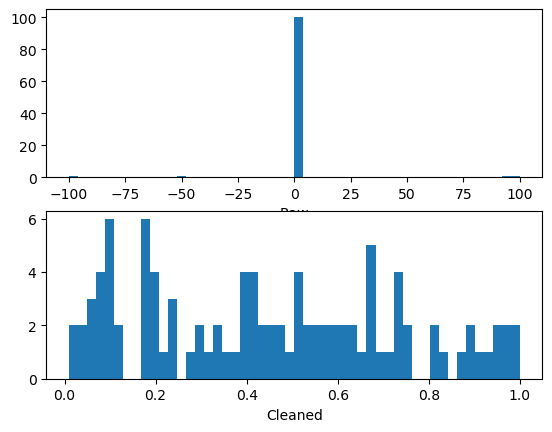

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def is_outlier(points, threshold=3.5):
    if len(points.shape) == 1:
        points = points[:,None]

    # compute median value    
    median = np.median(points, axis=0)
    
    # compute diff sums along the axis
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    # compute MAD
    med_abs_deviation = np.median(diff)
    
    modified_z_score = 0.6745 * diff / med_abs_deviation

    # return a mask for each outlier
    return modified_z_score > threshold

x = np.random.random(100)

buckets = 50

x = np.r_[x, -49, 95, 100, -100]

filtered = x[~is_outlier(x)]

plt.figure()

plt.subplot(211)
plt.hist(x, buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered, buckets)
plt.xlabel('Cleaned')

plt.show()

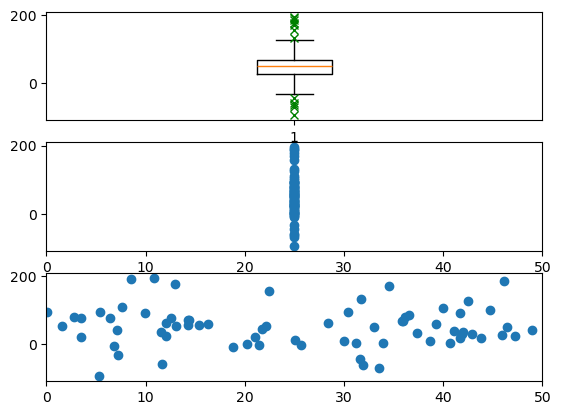

In [4]:
from pylab import *

spread= rand(50) * 100
center = ones(25) * 50

flier_high = rand(10) * 100 + 100
flier_low = rand(10) * -100

data = concatenate((spread, center, flier_high, flier_low), 0)

subplot(311)
boxplot(data, 0, 'gx')

subplot(312)
spread_1 = concatenate((spread, flier_high, flier_low), 0)
center_1 = ones(70) * 25
scatter(center_1, spread_1)
xlim([0, 50])

subplot(313)
center_2 = rand(70) * 50
scatter(center_2, spread_1)
xlim([0, 50])

show()